<h2> Nauczanie maszynowe/Ćwiczenia2

In [ ]:
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data['DESCR']) #opis tych danych (DESCRIPTION)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
d = boston_data['data']
d2 = d[:, [2,5]] #wyciągamy tylko 2 cechy: INDUS, RM
target = boston_data['target']

Funkcja kosztu mierzy średnią różnicę pomiędzy przewidywaniem a rzeczywistą wartością. Istnieje wiele funkcji tego typu, jedna z najpopularniejszych ma postać:

<center>
$LF(y,t) = \frac{1}{2N}\sum_{i}(y^{i}-t^{i})^2$
    
 

W przypadku regresji liniowej 2 zmiennych:
    
<center>
$LF(y,t) = \frac{1}{2N}\sum_{i}(w_1x_{1}^{i}+w_2x_{2}^{i}+w_0-t^{i})^2$

Zaimplementowałem zadania z poprzednich zajęć w postaci klasy.

In [ ]:
#Klasa dedykowana regresji liniowej 2 zmiennych

class LinearModel2v:
    def __init__(self, eta = 0.001, diff = 0.001, w1 = 1, w2 = 1, w0 = 1, maxiter = 10000):
        self.eta = eta
        self.diff = diff
        self.w1 = w1
        self.w2 = w2
        self.w0 = w0
        self.maxiter = maxiter
        


    def loss_function(self, X, t):
        N = len(X)
        C = 0
        for i in range(N):
            C += (X[i][0]*self.w1+X[i][1]*self.w2+self.w0-t[i])**2
        return C/(2*N)
  
    
    def update_weights(self, X, t):
        N = len(X)
        dC1 = 0
        dC2 = 0
        dC0 = 0
        for i in range(N):
            y_pred = X[i][0]*self.w1+X[i][1]*self.w2+self.w0
            dC1 += 2*X[i][0]*(y_pred-t[i])
            dC2 += 2*X[i][1]*(y_pred-t[i])
            dC0 += 2*(y_pred-t[i])

        self.w1 = self.w1 - self.eta*dC1/(2*N)
        self.w2 = self.w2 - self.eta*dC2/(2*N)
        self.w0 = self.w0 - self.eta*dC0/(2*N)

    def train(self, X, t):
        l = []
        ile = 0
        while True:
            l.append(self.loss_function(X, t))
            self.update_weights(X, t)
            ile += 1
            if len(l)>2:
                if abs(l[-1]-l[-2])/l[-1] <  self.diff or ile > self.maxiter:
                    break

Zobaczmy jak to działa na jakimś konkretnym przykładzie

In [ ]:
X = np.array([[1,4],[5,6],[2,2],[6,7],[9,-4],[-2,-3],[-5,1]])
y = np.dot(X, [3, -4])+5  #y=3x1-4x2+5

In [ ]:
model = LinearModel2v()
model.train(X, y)

In [ ]:
model.w1, model.w2, model.w0, model.loss_function(X, y)

(3.000309260729557,
 -3.999675320045806,
 4.99577829150021,
 6.215829033587025e-06)

<h3> Regresja wielomianowa

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

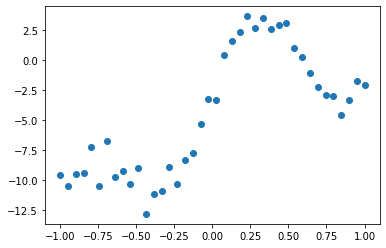

In [ ]:
rng = np.random.RandomState(1)
x = np.linspace(-1, 1, 40)
y = 3*x**3 - 4*x**2 + 6*x - 3 + 5*np.sin(5*x) + rng.randn(40)

plt.scatter(x,y)
plt.show()

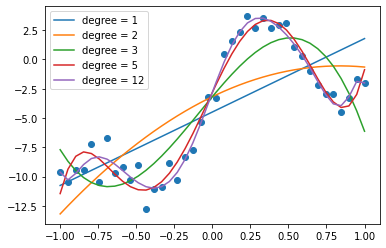

In [ ]:
plt.scatter(x,y)

for d in [1, 2, 3, 5, 12]:
    y_pred = PolynomialRegression(d).fit(x[:, np.newaxis], y).predict(x[:, np.newaxis])
    plt.plot(x, y_pred, label = f"degree = {d}")
    
plt.legend(loc = "best")
plt.show()

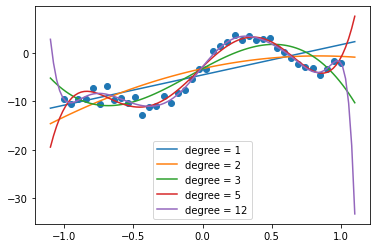

In [ ]:
#a jak to jest na większym przedziale?
plt.scatter(x,y)

for d in [1, 2, 3, 5, 12]:
    y_pred = PolynomialRegression(d).fit(x[:, np.newaxis], y).predict(np.linspace(-1.1,1.1,100)[:, np.newaxis])
    plt.plot(np.linspace(-1.1,1.1,100), y_pred, label = f"degree = {d}")
    
plt.legend(loc = "best")
plt.show()

Wniosek: Przy zbyt wysokim stopniu zastosowanego wielomianu możemy mieć problem z generalizacją - następuje przeuczenie (overfitting).


Z wielomianami związany jest też inny problem - efekt Rungego

<h3> Regularyzacja

Wprowadzenie szerszej klasy funkcji bazowych jak i ilości parametrów może bardzo szybko prowadzić do zjawiska overfittingu (przetrenowania). Jak sobie z tym poradzić? Na przykład, wprowadzając pewne dodatkowe obciążenie do funkcji kosztu zależne od współczynników:

- Regularyzacja L2 (Ridge Regression): $LF^{+} = \alpha \sum_i w_{i}^{2}$ 

- Regularyzacja L1 (Lasso Regression): $LF^{+} = \alpha \sum_i |w_{i}|$

tzn. $LF_{new} = LF + LF^{+}$.

<h4> Zadanie1: Zdefiniuj klasę implementującą regresję liniową z regularyzacją L1/L2 dla dowolnej liczby zmiennych.

In [ ]:
#Klasa dedykowana regresji liniowej 2 zmiennych

class LinearModel2v_s:
    def __init__(self, eta = 0.001, diff = 0.001, w1 = 1, w2 = 1, w0 = 1, maxiter = 10000, alpha = 0.5):
        self.eta = eta
        self.diff = diff
        self.alpha = alpha
        self.w1 = w1
        self.w2 = w2
        self.w0 = w0
        self.maxiter = maxiter
        
    def loss_function(self, X, t, regularization = 1):
        loss = 0
        ix = 0

        if regularization == 1: # LASSO
          norm = sum([abs(weight) for weight in [self.w1, self.w2, self.w0]])

        elif regularization == 2: # RIDGE
          norm = sum([weight**2 for weight in [self.w1, self.w2, self.w0]])

        for x in X :
          loss += (self.w1 * x[0] + self.w2 * x[1] + self.w0 - t[ix])**2 
          ix += 1
      
        return loss / (2 * len(t)) + self.alpha * norm


    def update_weights(self, X, t):
      weights = [0, 0, 0]
      length = len(t)

      ix = 0
      for x in X :
        common = 2 * (self.w1 * x[0] + self.w2 * x[1] + self.w0 - t[ix])
        weights[0] += x[0] * common
        weights[1] += x[1] * common
        weights[2] += common
        ix += 1

      self.w1 = self.w1 - self.eta*weights[0]/(2*length)
      self.w2 = self.w2 - self.eta*weights[1]/(2*length)
      self.w0 = self.w0 - self.eta*weights[2]/(2*length)

    def train(self, X, t):
        lf = []
        iter = 0
        while True:
            lf.append(self.loss_function(X, t))
            self.update_weights(X, t)
            iter += 1
            if len(lf)>2:
                if abs(lf[-1]-lf[-2])/lf[-1] <  self.diff or iter > self.maxiter:
                    break



In [ ]:
model = LinearModel2v_s(w1 = 3, w2 = 8, w0 = -1)
model.train(d2, target)


<h4> Zadanie2: Wybierz dowolny zbiór danych lub wygeneruj syntetyczne dane. Zastosuj model regresji liniowej z regularyzacją $L1$. Na podstawie zbioru walidacyjnego wybierz optymalne parametry $\eta$ oraz $\alpha$ (rozważ chociaż 15-20 różnych kombinacji).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(d2, target, test_size=0.4, random_state=42)
X2_validate, X2_test, y2_validate, y2_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [ ]:
model = LinearModel2v_s(eta = 0.001, alpha = 0.001)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

25.434262082752497

In [ ]:
model = LinearModel2v_s(eta = 0.01, alpha = 0.01)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

25.424782554629317

In [ ]:
model = LinearModel2v_s(eta = 0.001, alpha = 0.01)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

25.50655054170027

In [ ]:
model = LinearModel2v_s(eta = 0.001, alpha = 1)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

31.768480896901067

In [ ]:
model = LinearModel2v_s(eta = 0.001, alpha = 5)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

55.34350722346852

In [ ]:
model = LinearModel2v_s(eta = 0.0001, alpha = 5)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

97.4857132206197

In [ ]:
model = LinearModel2v_s(eta = 0.00065, alpha = 5)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

56.557659194781316

In [ ]:
model = LinearModel2v_s(eta = 0.00065, alpha = 1)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

32.585299349629494

In [ ]:
model = LinearModel2v_s(eta = 0.00075, alpha = 0.25)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

27.45881650730766

In [ ]:
model = LinearModel2v_s(eta = 0.00095, alpha = 0.25)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

27.08844803314181

In [ ]:
model = LinearModel2v_s(eta = 0.002, alpha = 0.25)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

26.401635449942653

In [ ]:
model = LinearModel2v_s(eta = 0.003, alpha = 0.25)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

26.20958099932908

In [ ]:
model = LinearModel2v_s(eta = 0.005, alpha = 0.25)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

26.056300266059086

In [ ]:
model = LinearModel2v_s(eta = 0.0075, alpha = 0.25)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

25.979531026110433

In [ ]:
model = LinearModel2v_s(eta = 0.0075, alpha = 0.15)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

25.35797814492551

In [ ]:
model = LinearModel2v_s(eta = 0.0075, alpha = 0.20)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

25.660150832300182

In [ ]:
model = LinearModel2v_s(eta = 0.0075, alpha = 0.1)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

25.039032156426014

In [ ]:
model = LinearModel2v_s(eta = 0.0075, alpha = 0.01)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

24.49382074037928

In [ ]:
model = LinearModel2v_s(eta = 0.006, alpha = 0.001)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

24.47676253582798

In [ ]:
model = LinearModel2v_s(eta = 0.0075, alpha = 0.005)
model.train(X2_validate, y2_validate)
model.loss_function(X_train,y_train)

24.463531217265576

In [ ]:
model = LinearModel2v_s(eta = 0.0075, alpha = 0.005)
model.train(X_train, y_train)
model.loss_function(X2_test, y2_test)

21.967603260306934

<h3> Regresja logistyczna

Rozważamy zmienną losową $Y$ przyjmującą tylko dwie wartości, tzn. $ Y \in \lbrace 0, 1 \rbrace$. Załóżmy dodatkowo, że $p = P(Y=1)$ (wtedy $1-p = P(Y=0)$). Będziemy chcieli zamodelować $p$ w oparciu o pewne cechy $X_1,..,X_n$. Jako, że $p \in (0,1)$, to $\frac{p}{1-p} \in (0,\infty)$ i dalej $\log(\frac{p}{1-p}) \in (-\infty, \infty)$. Tę ostatnią wartość będziemy przybliżać za pomocą modelu regresji liniowej, tzn:
<br>

<center>
    $\log(\frac{p}{1-p}) = X_1w_1+X_2w_2+...+X_nw_n+X_0$
    
Przekształcając powyższe równanie otrzymujemy, że $p = \frac{1}{1+e^{-(X_1w_1+X_2w_2+...+X_nw_n+X_0)}}$
    
Funkcja kosztu zdefiniowana nie jest jest już różnicą pomiędzy przewidywaną wartością a przewidywaniem modelu. Czemu? Tym razem stosujemy entropię krzyżową. $LF = -\frac{1}{N}\sum_i (y_i \log(p(X_{1}^{i},..,X_{n}^{i}))+(1-y_i) \log(1-p(X_{1}^{i},..,X_{n}^{i})))$.
    
Regularyzacja $L_2$ w przypadku regresji logistycznej. $LF = -\frac{1}{N}\sum_i (y_i \log(p(X_{1}^{i},..,X_{n}^{i}))+(1-y_i) \log(1-p(X_{1}^{i},..,X_{n}^{i}))) + \alpha||w||^2$. Analogicznie w przypadku $L_1$
    
W przypadku regresji logistycznej częściej posługujemy się parameterem $C = \frac{1}{\alpha}$. Jeżeli $C$ małe, to silna regularyzacja, 

In [ ]:
from sklearn import linear_model

model = linear_model.LogisticRegression()

X = np.array([[1,2],[2,3],[4,5],[1,-4],[5,-7],[-3,-1]])
y  = np.array([0, 0, 0, 1, 1, 1])

model.fit(X,y);

In [ ]:
model.coef_, model.intercept_ #parametry modelu

(array([[-0.39682866, -0.82497163]]), array([0.11932619]))

In [ ]:
model.predict([[3,3]]), model.predict_proba([[3,3]]) #predykcja klasy oraz odpowiednie prawdopodobienstwa

(array([0]), array([[0.97197068, 0.02802932]]))

<h4> Zadanie3: Uzasadnij powyższe wartości prawdopodobieństw w oparciu o parametry modelu.

Powyższe wartości prawdopodobieństw wskazują na ok. 97% szansy, że [3,3] należy do klasy 0 oraz na ok 3% prawdopodobieństwo, że [3,3] należy do klasy 1. Wagi pierwszego [1,2,4,1,5,-3] i drugiego [2,3,5,-4,-7,-1] predyktora to odpowiednio -0.39683 oraz -0.82497. 0.12 - intercept podanego modelu to "stronniczość" dodana do modelu w trakcie dopasowywania.

<h4> Zadanie*: Zaimplementuj klasę dla regresji logistycznej (wraz z regularyzacją $L_1$ oraz $L_2$).

In [ ]:
#Klasa dedykowana regresji logistycznej

class LoReModel2v_s:
    def __init__(self, eta = 0.001, diff = 0.001, w1 = 1.0, w2 = 1.0, w0 = 1.0, maxiter = 10000, alpha = 0.005):
        self.eta = eta
        self.diff = diff
        self.alpha = alpha
        self.w1 = w1
        self.w2 = w2
        self.w0 = w0
        self.maxiter = maxiter
        
    def probs(self, X):
        weights = np.array([self.w1, self.w2])
        prob = (1 / (1 + np.exp(-(np.dot(X, weights) + self.w0))))
        return prob

    def loss_function(self, X, t, regularization = 1):
        if regularization == 1: # LASSO
          norm = sum([abs(weight) for weight in [self.w1, self.w2, self.w0]])
        elif regularization == 2: # RIDGE
          norm = sum([weight**2 for weight in [self.w1, self.w2, self.w0]])

        ix = 0
        for x in X:
         loss += t[ix] * np.log(self.probs(x)) \
                + (1 - t[ix]) * np.log(1 - self.probs(x))
         ix +=1 

        return -loss / (len(t)) + self.alpha * norm


    def update_weights(self, X, t):
      length = len(t)
 
      w1w2 = (1/length) * np.dot(X.T, self.probs(X) - t)
      w0   = (1/length) * np.sum((self.probs(X) - t))


      self.w1 = self.w1 - self.eta * w1w2[0]
      self.w2 = self.w2 - self.eta * w1w2[1]
      self.w0 = self.w0 - self.eta * w0

    def predict(self, X):
      probabs = self.probs(X)
      class_x = [1 if probabs >= 0.5 else 0]
      return class_x



    def train(self, X, t):
        lf = []
        iter = 0
        while True:
            lf.append(self.loss_function(X, t))
            self.update_weights(X, t)
            iter += 1
            if len(lf)>2:
                if abs(lf[-1]-lf[-2])/lf[-1] <  self.diff or iter > self.maxiter:
                    break


In [ ]:
model = LoReModel2v_s()
model.train(X, y)


model.loss_function(X, y)



0.04590748691683299

In [ ]:
model.predict([3,3])

[0]

<h3> Regresja logistyczna wieloklasowa

W tym przypadku stosujemy prawdpodobieństwa SoftMax, tzn $P(X=i) = \frac{e^{z_i}}{\sum_j e^{z_j}}$

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1) #generuje sobie dane

print(X.shape, y.shape)
print(Counter(y))

(1000, 10) (1000,)
Counter({1: 334, 2: 334, 0: 332})


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X, y);

In [ ]:
print(model.coef_) #parametry modelu

[[ 0.01577681 -0.05318977  0.21160694  0.14655186 -0.24476592 -0.00318551
  -0.20914917 -0.26505038 -0.02765106  0.26778537]
 [ 0.20327639  0.0990516  -0.39851296 -0.1045002   0.02344135 -0.06340171
   0.19494493  0.54495946 -0.18417782 -0.2844254 ]
 [-0.2190532  -0.04586183  0.18690602 -0.04205165  0.22132456  0.06658722
   0.01420424 -0.27990908  0.21182888  0.01664003]]


In [ ]:
print(model.intercept_) #parametry modelu

[ 0.0294703  -0.26754233  0.23807203]


In [ ]:
#nowa obserwacja
row = [1.89149379, -0.39847585, 1.63856893, 0.01647165, 1.51892395, -3.52651223, 1.80998823, 0.58810926, -0.02542177, -0.52835426]
#przewiduje jej klasę
yhat = model.predict([row])
print(f'Przewidziana klasa: {yhat[0]}')

Przewidziana klasa: 1


In [ ]:
#przewiduje prawdopodobienstwa
yhat = model.predict_proba([row])
print(f'Przewidziane prawdopodobieństwa: {yhat[0]}')

Przewidziane prawdopodobieństwa: [0.16470456 0.50297138 0.33232406]


<h4> Zadanie4: Wyznacz powyższe prawdopodobieństwa ręcznie na podstawie parametrów modelu.

In [ ]:
def softmax (input) : 
  return np.exp(input) / np.sum(np.exp(input))

In [ ]:
row = np.array(row)
input_function = []

In [ ]:
for x in range(3):
  input_function.append(np.dot(model.coef_[x],row) + model.intercept_[x])

In [ ]:
softmax_prob = softmax(input_function)
softmax_prob

array([0.16470456, 0.50297138, 0.33232406])

Przykład praktyczny

In [ ]:
import pandas as pd 

#dane i opis danych: https://archive.ics.uci.edu/ml/datasets/Wine
df_wine = pd.read_csv('/content/wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanolds', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanolds,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
print('Kategorie: ', np.unique(df_wine['Class label']))

Kategorie:  [1 2 3]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3])

In [ ]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [ ]:
lr1 = LogisticRegression(penalty='l2', C=0.1)
lr1.fit(X_train_std, y_train)

print('Dokladnosc na zbiorze treningowym:', lr1.score(X_train_std, y_train))
print('Dokladnosc na zbiorze testowym:', lr1.score(X_test_std, y_test))

Dokladnosc na zbiorze treningowym: 0.991869918699187
Dokladnosc na zbiorze testowym: 1.0


In [ ]:
weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l2', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
    
weights = np.array(weights)

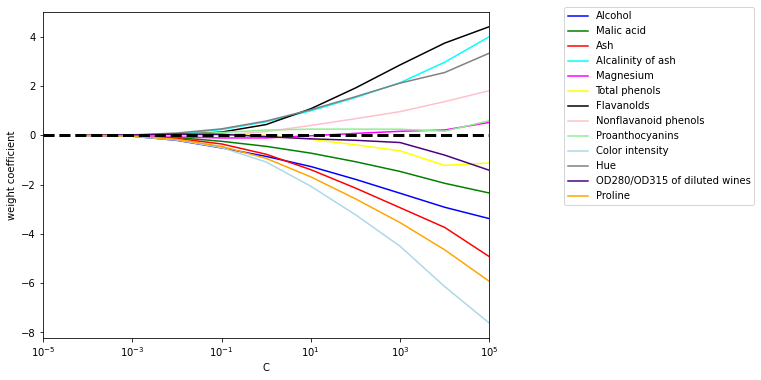

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot( params, 
              weights[:, column], 
              label=df_wine.columns[column+1],
              color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, 
          fancybox=True)
plt.show()

<h4> Zadanie5: Wyjaśnij powyższy wykres? Co oznacza to rozgałęzienie?

Parametr C jest odwrotnie proporcjonalny do siły regularyzacji. Zmniejszając parametr C, zwiększamy regularyzację, a zatem wielkość współczynników wag maleje. Gdy regularyzacja maleje - parametr C jest większy, współczynniki wag mogą być za duże.


